In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
new_model_m = tf.keras.models.load_model('mouth_model_00.h5') 

In [3]:
new_model = tf.keras.models.load_model('my_model_3.h5')

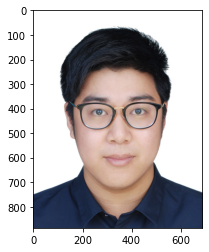

In [4]:
img = cv2.imread('selfie.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

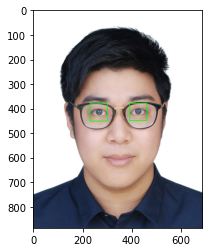

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## cropping the Eye image

In [6]:
# cropping
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

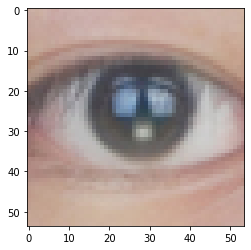

In [7]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [8]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
final_image = final_image/255.0

new_model.predict(final_image)

array([[0.99991196]], dtype=float32)

In [14]:
import winsound
frequency = 1500 # Set Frequency To 1500 Hertz
duration = 1000  # Set Duration To 1000
import numpy as np
import cv2
path = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0    
while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('eyes are not detected')
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)            
    
    #Draw a rectangle around the face
    for(x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putTEXT() method for inserting text on video
    
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0) ## need fourth dimension
    final_image = final_image/255.0
    
    final_imagem = cv2.resize(frame, (224,224))
    final_imagem = np.expand_dims(final_imagem, axis = 0) ## need fourth dimension
    final_imagem = final_imagem/255.0
                     
    Predictions = new_model.predict(final_image)
    Prediction_m = new_model_m.predict(final_imagem)
    
    if (Prediction_m>0.5):
        status_m = "Yawn"
        cv2.putText(frame, status_m, (180, 80), font, 2, (0, 0, 255), 2, cv2.LINE_4)
    else:
        status_m = "Normal Mouth"
        cv2.putText(frame, status_m, (180, 80), font, 2, (0, 255, 0), 2, cv2.LINE_4)
    
    if (Predictions>0.5):
        status = "Open Eyes"
        cv2.putText(frame, status, (180, 150), font, 2, (0, 255, 0), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (180, 150), font, 2, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        if counter > 3 and status_m == "Yawn":
            x1,y1,w1,h1 = 0,0,175,75
            # Draw black backgrond rectangle
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            # Add text
            cv2.putText(frame, 'Sleep Alert!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
            winsound.Beep(frequency, duration)
            counter = 0
    
    
   
    cv2.imshow('Driver Fatigue Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyALLWindows()
        

False
False
False
False
False
eyes are not detected
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
eyes are not

False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes

KeyboardInterrupt: 